**Enter you ID and Name here**

**Robiul Islam Jubaer**
ID: 2125051097;

The heart disease dataset will be used for this task. This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

**Attributes**
1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholesterol in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by fluoroscopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversible defect
14. target


Before completing each task, create a text cell and write the name of that task there. For example

(Task 01.1)

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Autumn 2024/Machine Learning/Week 8/heart.csv")

In [4]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [7]:
# Solution of Task 01
# Check for missing values in each column
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [10]:
# Solution of Task 2.
# Calculate age statistics for patients without heart disease (target = 0)
no_disease_stats = df[df['target'] == 0]['age'].describe()

# Calculate age statistics for patients with heart disease (target = 1)
disease_stats = df[df['target'] == 1]['age'].describe()

# Display the results
print("Age Distribution for Patients Without Heart Disease:")
print(no_disease_stats)
print("\nAge Distribution for Patients With Heart Disease:")
print(disease_stats)


Age Distribution for Patients Without Heart Disease:
count    499.000000
mean      56.569138
std        7.908153
min       35.000000
25%       52.000000
50%       58.000000
75%       62.000000
max       77.000000
Name: age, dtype: float64

Age Distribution for Patients With Heart Disease:
count    526.000000
mean      52.408745
std        9.631804
min       29.000000
25%       44.000000
50%       52.000000
75%       59.000000
max       76.000000
Name: age, dtype: float64


In [11]:
#solution of task 3
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for trestbps and chol
Q1_trestbps = df['trestbps'].quantile(0.25)
Q3_trestbps = df['trestbps'].quantile(0.75)
IQR_trestbps = Q3_trestbps - Q1_trestbps

Q1_chol = df['chol'].quantile(0.25)
Q3_chol = df['chol'].quantile(0.75)
IQR_chol = Q3_chol - Q1_chol

# Identify outliers in trestbps and chol
outliers_trestbps = df[(df['trestbps'] < (Q1_trestbps - 1.5 * IQR_trestbps)) | (df['trestbps'] > (Q3_trestbps + 1.5 * IQR_trestbps))]
outliers_chol = df[(df['chol'] < (Q1_chol - 1.5 * IQR_chol)) | (df['chol'] > (Q3_chol + 1.5 * IQR_chol))]

# Display the number of outliers
print("Number of outliers in resting blood pressure (trestbps):", outliers_trestbps.shape[0])
print("Number of outliers in cholesterol (chol):", outliers_chol.shape[0])


Number of outliers in resting blood pressure (trestbps): 30
Number of outliers in cholesterol (chol): 16


In [12]:
#solution of task 04
import pandas as pd

# Assuming 'df' is your DataFrame containing the heart disease data
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
correlation_matrix = df[continuous_features].corr()

print(correlation_matrix)


               age  trestbps      chol   thalach   oldpeak
age       1.000000  0.271121  0.219823 -0.390227  0.208137
trestbps  0.271121  1.000000  0.127977 -0.039264  0.187434
chol      0.219823  0.127977  1.000000 -0.021772  0.064880
thalach  -0.390227 -0.039264 -0.021772  1.000000 -0.349796
oldpeak   0.208137  0.187434  0.064880 -0.349796  1.000000


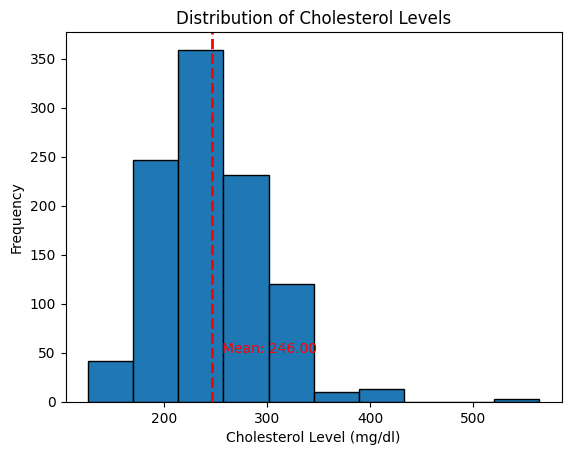

In [13]:


#solution of task 05
import matplotlib.pyplot as plt
import numpy as np

# Create the histogram
plt.hist(df['chol'], bins=10, edgecolor='black')

# Calculate the mean cholesterol level
mean_chol = df['chol'].mean()

# Annotate the mean value
plt.axvline(mean_chol, color='red', linestyle='dashed', linewidth=2)
plt.text(mean_chol + 10, 50, f'Mean: {mean_chol:.2f}', color='red')

# Add labels and title
plt.xlabel('Cholesterol Level (mg/dl)')
plt.ylabel('Frequency')
plt.title('Distribution of Cholesterol Levels')

# Display the histogram
plt.show()

    count        mean        std    min    25%    50%    75%    max
cp                                                                 
0   497.0  140.052314  22.930410   71.0  125.0  142.0  158.0  186.0
1   167.0  162.179641  19.137204  103.0  155.0  164.0  173.0  202.0
2   284.0  155.116197  19.225017   96.0  147.0  157.0  170.0  194.0
3    77.0  157.129870  20.286339  114.0  145.0  159.0  174.0  190.0


<ipython-input-15-d1be951cf1d1>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cp', y='thalach', data=df, palette="Set2", linewidth=2.5)  # Use a different color palette and increase linewidth


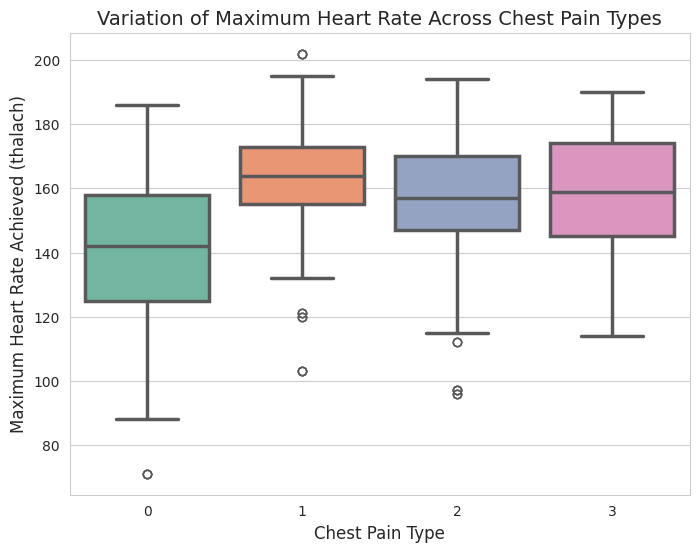

In [15]:
#solution of task 06
# Group data by chest pain type
grouped_data = df.groupby('cp')

# Calculate statistics for 'thalach' within each group
thalach_stats = grouped_data['thalach'].describe()

# Display the statistics
print(thalach_stats)

import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plot
sns.set_style("whitegrid")  # You can try other styles like 'darkgrid', 'white', 'ticks', etc.

# Create the box plot with customized style
plt.figure(figsize=(8, 6))
sns.boxplot(x='cp', y='thalach', data=df, palette="Set2", linewidth=2.5)  # Use a different color palette and increase linewidth

plt.xlabel('Chest Pain Type', fontsize=12)  # Increase font size of labels
plt.ylabel('Maximum Heart Rate Achieved (thalach)', fontsize=12)
plt.title('Variation of Maximum Heart Rate Across Chest Pain Types', fontsize=14)  # Increase font size of title

plt.xticks(fontsize=10)  # Adjust font size of x-axis ticks
plt.yticks(fontsize=10)  # Adjust font size of y-axis ticks

plt.show()

<ipython-input-19-6c84e7afbbdc>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='target', y='resting_blood_pressure', data=df, palette='muted')


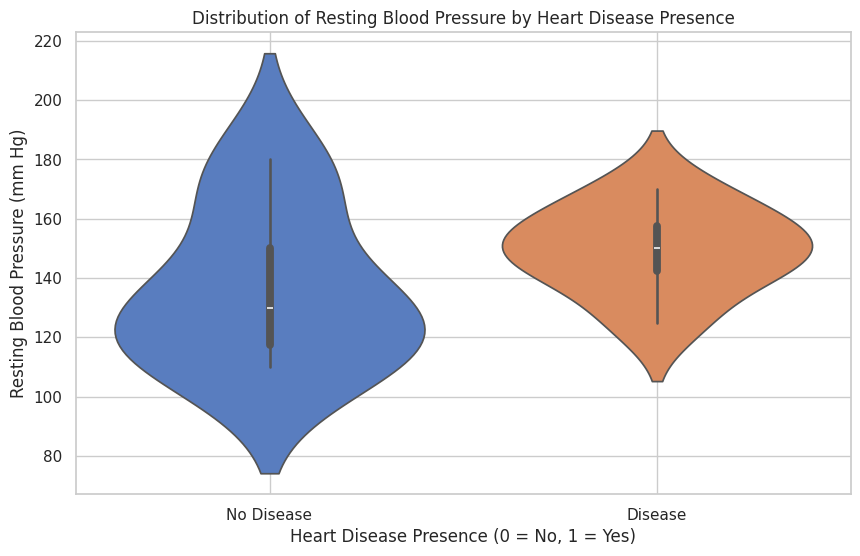

In [19]:
#Solution of question 07
# Step 1: Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Load the dataset
# For example, if the dataset is in a CSV file called 'heart_disease.csv', you can load it like this:
# Replace 'path_to_your_file' with the actual path or URL to your dataset.
# df = pd.read_csv('path_to_your_file')

# For demonstration, let's create a sample DataFrame
data = {
    'resting_blood_pressure': [120, 130, 140, 150, 160, 110, 115, 125, 135, 145, 155, 165, 170, 180],
    'target': [0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0]
}
df = pd.DataFrame(data)

# Step 3: Create the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='target', y='resting_blood_pressure', data=df, palette='muted')
plt.title('Distribution of Resting Blood Pressure by Heart Disease Presence')
plt.xlabel('Heart Disease Presence (0 = No, 1 = Yes)')
plt.ylabel('Resting Blood Pressure (mm Hg)')
plt.xticks([0, 1], ['No Disease', 'Disease'])
plt.grid(True)
plt.show()

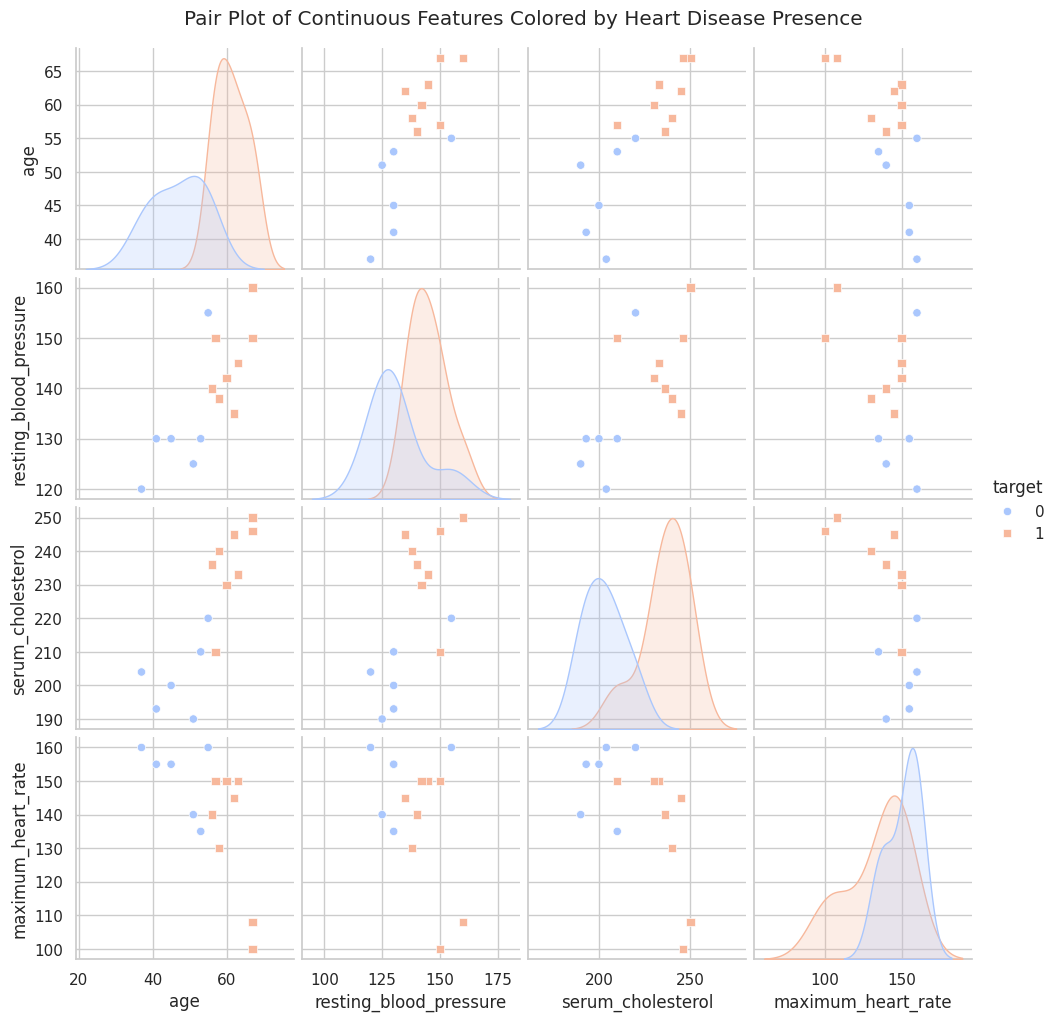

In [20]:
#Solution of question no 08
# Step 1: Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Load the dataset
# For example, if the dataset is in a CSV file called 'heart_disease.csv', you can load it like this:
# df = pd.read_csv('path_to_your_file')

# For demonstration, let's create a sample DataFrame with some continuous features
data = {
    'age': [63, 67, 67, 37, 41, 56, 62, 57, 55, 60, 45, 51, 53, 58],
    'resting_blood_pressure': [145, 160, 150, 120, 130, 140, 135, 150, 155, 142, 130, 125, 130, 138],
    'serum_cholesterol': [233, 250, 246, 204, 193, 236, 245, 210, 220, 230, 200, 190, 210, 240],
    'maximum_heart_rate': [150, 108, 100, 160, 155, 140, 145, 150, 160, 150, 155, 140, 135, 130],
    'target': [1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1]
}
df = pd.DataFrame(data)

# Step 3: Create a pair plot for continuous features colored by target
continuous_features = ['age', 'resting_blood_pressure', 'serum_cholesterol', 'maximum_heart_rate']
pairplot = sns.pairplot(df, vars=continuous_features, hue='target', palette='coolwarm', markers=["o", "s"])
plt.suptitle('Pair Plot of Continuous Features Colored by Heart Disease Presence', y=1.02)
plt.show()

In [24]:
#solution of question 9
import pandas as pd
from sklearn.preprocessing import LabelEncoder


In [25]:
from sklearn.preprocessing import LabelEncoder

# Example for chest pain type
label_encoder = LabelEncoder()
df['chest_pain_type_encoded'] = label_encoder.fit_transform(df['chest_pain_type'])